# Etapa 4 - Construcción de Vista Minable

**Proyecto:** Ciencia de Datos - Preparación de Datos  
**Universidad:** Pontificia Universidad Javeriana  
**Curso:** Tecnologías Emergentes 2025  
**Profesor:** Luis Carlos Chicaíza

---

## Objetivo de esta Etapa

Construir una **vista minable** a partir del dataset limpio de accidentes de tránsito, mediante la
aplicación de ingeniería de atributos y la selección de variables relevantes para el análisis posterior.
Además, generar una tabla resumen agregada que facilite el análisis de patrones por año, mes, comuna
y gravedad.

## 1. Configuración Inicial

In [8]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

import sys
import os
sys.path.append(os.path.abspath(".."))

from src.vista_minable import (
    cargar_datos_limpios,
    ingenieria_atributos,
    construir_vista_minable,
)

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Configuración de visualización
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Librerías importadas y configuradas")


✓ Librerías importadas y configuradas


## 2. Carga del Dataset Limpio


In [9]:
# Ruta del dataset limpio generado en la Etapa 3
ruta_limpio = '../data/processed/accidentes_transito_limpio.csv'

# Cargar datos limpios
df_limpio = cargar_datos_limpios(ruta_limpio)

print("="*80)
print("DATASET LIMPIO - INFORMACIÓN BÁSICA")
print("="*80)
print(f"Registros: {len(df_limpio):,}")
print(f"Atributos: {df_limpio.shape[1]}")
display(df_limpio.head())


DATASET LIMPIO - INFORMACIÓN BÁSICA
Registros: 39,193
Atributos: 23


,FECHA,AÑO,MES,DÍA,GRAVEDAD,PEATON,AUTOMOVIL,CAMPERO,CAMIONETA,MICRO,BUSETA,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,OTRO,BARRIO,HORA,ENTIDAD,COMUNA,Propietario de Vehículo,DIURNIO/NOCTURNO
0,2012-01-01T00:00:00.000,2012,01. Enero,07. Domingo,Con heridos,0,1.00,0,0,0,0,0,0,0,0.00,0,0,Mutis,1899-12-31T12:15:00.000,AGENTES DTB,17. MUTIS,Particular,Diurno
1,2012-01-01T00:00:00.000,2012,01. Enero,07. Domingo,Solo daños,0,1.00,0,1,0,0,0,0,0,0.00,0,0,Regaderos Norte,1899-12-31T14:00:00.000,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno
2,2012-01-01T00:00:00.000,2012,01. Enero,07. Domingo,Solo daños,0,0.00,0,1,0,0,0,0,0,0.00,0,0,Cabecera Del Llano,1899-12-31T12:00:00.000,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno
3,2012-01-01T00:00:00.000,2012,01. Enero,07. Domingo,Solo daños,0,1.00,0,1,0,0,0,0,0,0.00,0,0,Norte Bajo,1899-12-31T18:30:00.000,AGENTES DTB,03. SAN FRANCISCO,Empresa,Nocturno
4,2012-01-01T00:00:00.000,2012,01. Enero,07. Domingo,Con heridos,1,0.00,0,0,0,0,0,0,0,1.00,0,0,Dangond,1899-12-31T00:30:00.000,AGENTES DTB,11. SUR,Particular,Nocturno


## 3. Ingeniería de Atributos

En esta sección se generan nuevas variables derivadas de las columnas de fecha, hora y ubicación, entre otras.
Estas variables incluyen:

- **anio, mes_num, dia_mes**: componentes temporales de la fecha del accidente.  
- **dia_semana, es_fin_de_semana**: para diferenciar comportamientos entre días laborales y fines de semana.  
- **hora_num, franja_horaria**: para analizar patrones por franjas horarias.  
- **comuna_codigo, comuna_nombre**: descomposición de la variable `COMUNA`.  
- **periodo_dia**: normalización de la variable `DIURNIO/NOCTURNO`.


In [10]:
# Aplicar ingeniería de atributos
df_feat = ingenieria_atributos(df_limpio)

print("="*80)
print("DATASET CON ATRIBUTOS DERIVADOS")
print("="*80)
display(df_feat.head())

# Verificar presencia de nuevas columnas
columnas_derivadas = [
    'anio', 'mes_num', 'dia_mes', 'dia_semana', 'es_fin_de_semana',
    'hora_num', 'franja_horaria', 'comuna_codigo', 'comuna_nombre', 'periodo_dia'
]
print("\nColumnas derivadas creadas:")
for col in columnas_derivadas:
    print(f" - {col}: {'OK' if col in df_feat.columns else 'NO ENCONTRADA'}")


DATASET CON ATRIBUTOS DERIVADOS


,FECHA,AÑO,MES,DÍA,GRAVEDAD,PEATON,AUTOMOVIL,CAMPERO,CAMIONETA,MICRO,BUSETA,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,OTRO,BARRIO,HORA,ENTIDAD,COMUNA,Propietario de Vehículo,DIURNIO/NOCTURNO,anio,mes_num,dia_mes,dia_semana_num,dia_semana,es_fin_de_semana,hora_num,minuto,franja_horaria,comuna_codigo,comuna_nombre,periodo_dia
0,2012-01-01,2012,01. Enero,07. Domingo,Con heridos,0,1.00,0,0,0,0,0,0,0,0.00,0,0,Mutis,1899-12-31T12:15:00.000,AGENTES DTB,17. MUTIS,Particular,Diurno,2012,1,1,6,Domingo,True,12.00,15.00,Tarde,17,MUTIS,Diurno
1,2012-01-01,2012,01. Enero,07. Domingo,Solo daños,0,1.00,0,1,0,0,0,0,0,0.00,0,0,Regaderos Norte,1899-12-31T14:00:00.000,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno,2012,1,1,6,Domingo,True,14.00,0.00,Tarde,02,NORORIENTAL,Diurno
2,2012-01-01,2012,01. Enero,07. Domingo,Solo daños,0,0.00,0,1,0,0,0,0,0,0.00,0,0,Cabecera Del Llano,1899-12-31T12:00:00.000,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno,2012,1,1,6,Domingo,True,12.00,0.00,Tarde,12,CABECERA DEL LLANO,Diurno
3,2012-01-01,2012,01. Enero,07. Domingo,Solo daños,0,1.00,0,1,0,0,0,0,0,0.00,0,0,Norte Bajo,1899-12-31T18:30:00.000,AGENTES DTB,03. SAN FRANCISCO,Empresa,Nocturno,2012,1,1,6,Domingo,True,18.00,30.00,Noche,03,SAN FRANCISCO,Nocturno
4,2012-01-01,2012,01. Enero,07. Domingo,Con heridos,1,0.00,0,0,0,0,0,0,0,1.00,0,0,Dangond,1899-12-31T00:30:00.000,AGENTES DTB,11. SUR,Particular,Nocturno,2012,1,1,6,Domingo,True,0.00,30.00,Madrugada,11,SUR,Nocturno



Columnas derivadas creadas:
 - anio: OK
 - mes_num: OK
 - dia_mes: OK
 - dia_semana: OK
 - es_fin_de_semana: OK
 - hora_num: OK
 - franja_horaria: OK
 - comuna_codigo: OK
 - comuna_nombre: OK
 - periodo_dia: OK


### 3.1 Distribución de accidentes por nuevas variables

Se realizan algunas visualizaciones simples para validar y entender las nuevas variables creadas,
por ejemplo, la distribución de accidentes por `franja_horaria`, `dia_semana` y `periodo_dia`.


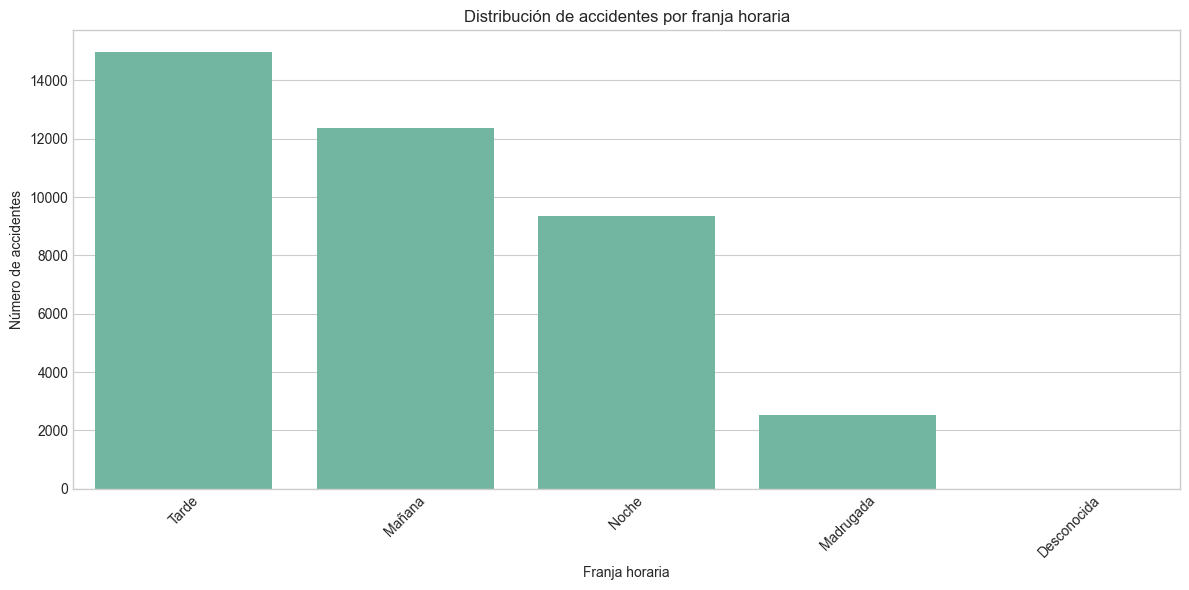

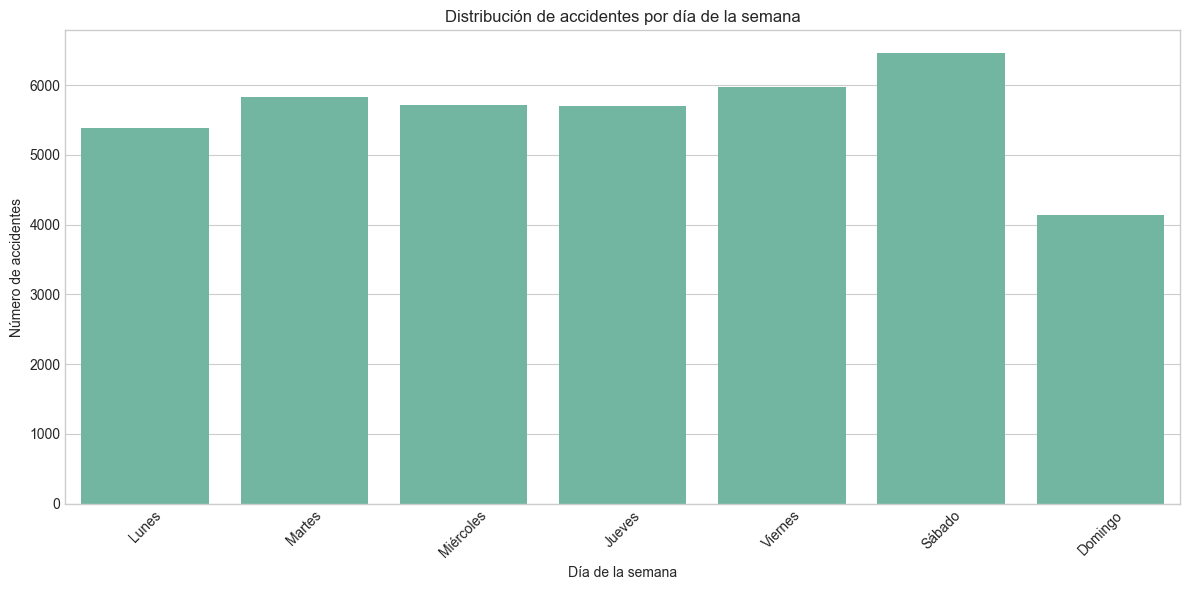

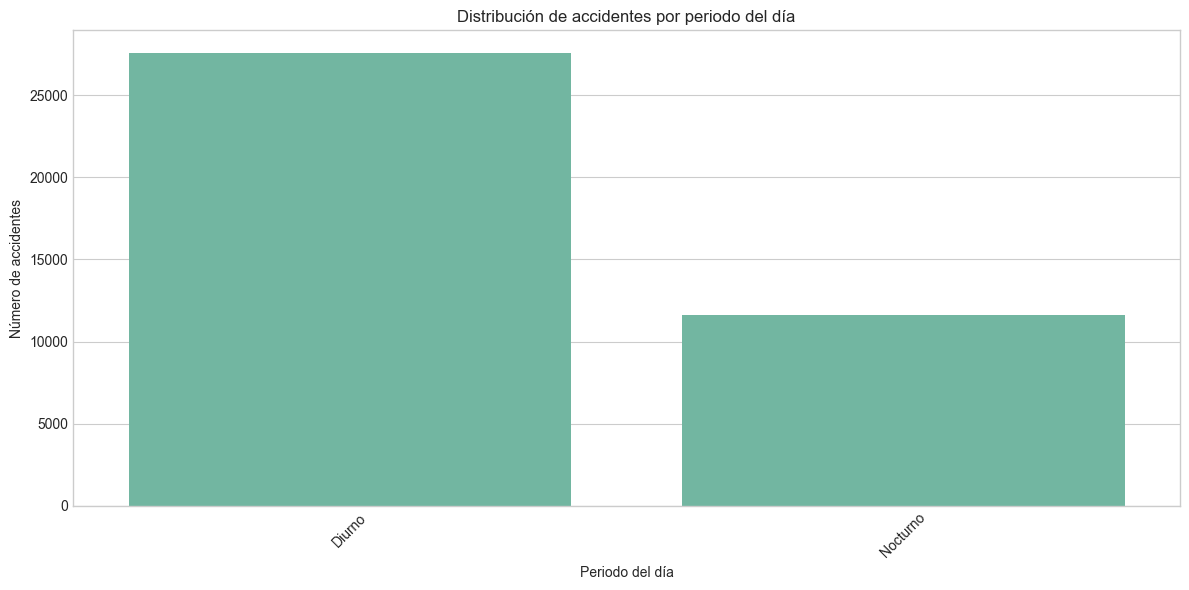

In [11]:
# Distribución por franja horaria
if 'franja_horaria' in df_feat.columns:
    plt.figure()
    sns.countplot(
        data=df_feat,
        x='franja_horaria',
        order=df_feat['franja_horaria'].value_counts().index
    )
    plt.title('Distribución de accidentes por franja horaria')
    plt.xlabel('Franja horaria')
    plt.ylabel('Número de accidentes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'franja_horaria' no está disponible.")

# Distribución por día de la semana
# Distribución por día de la semana
if 'dia_semana' in df_feat.columns:
    plt.figure()

    # Si tenemos columna numérica de día de la semana, la usamos para ordenar
    if 'dia_semana_num' in df_feat.columns:
        orden_dias = (
            df_feat[['dia_semana', 'dia_semana_num']]
            .dropna()
            .drop_duplicates()
            .sort_values('dia_semana_num')['dia_semana']
            .tolist()
        )
    else:
        # Si no, usamos el orden por frecuencia
        orden_dias = df_feat['dia_semana'].value_counts().index.tolist()

    sns.countplot(
        data=df_feat,
        x='dia_semana',
        order=orden_dias
    )
    plt.title('Distribución de accidentes por día de la semana')
    plt.xlabel('Día de la semana')
    plt.ylabel('Número de accidentes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'dia_semana' no está disponible.")
    
# Distribución por periodo del día
if 'periodo_dia' in df_feat.columns:
    plt.figure()
    sns.countplot(
        data=df_feat,
        x='periodo_dia',
        order=df_feat['periodo_dia'].value_counts().index
    )
    plt.title('Distribución de accidentes por periodo del día')
    plt.xlabel('Periodo del día')
    plt.ylabel('Número de accidentes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'periodo_dia' no está disponible.")


## 4. Construcción de la Vista Minable

En esta etapa se construye formalmente la vista minable a partir del dataset con atributos derivados,
seleccionando aquellas columnas más relevantes para el análisis posterior y guardándola en la carpeta
`data/processed/`. También se genera una tabla resumen agregada por año, mes, comuna y gravedad.


In [12]:
# Construir vista minable y tabla resumen utilizando la función auxiliar
ruta_salida_vista = '../data/processed/accidentes_transito_vista_minable.csv'
ruta_salida_resumen = '../data/processed/accidentes_transito_resumen_mes_comuna.csv'

df_vista, df_resumen = construir_vista_minable(
    filepath_in=ruta_limpio,
    filepath_out_vista=ruta_salida_vista,
    filepath_out_resumen=ruta_salida_resumen,
)

print("="*80)
print("VISTA MINABLE - INFORMACIÓN BÁSICA")
print("="*80)
print(f"Registros (vista): {len(df_vista):,}")
print(f"Columnas  (vista): {df_vista.shape[1]}")
display(df_vista.head())

print("\n" + "="*80)
print("TABLA RESUMEN - INFORMACIÓN BÁSICA")
print("="*80)
print(f"Registros (resumen): {len(df_resumen):,}")
print(f"Columnas  (resumen): {df_resumen.shape[1]}")
display(df_resumen.head())


VISTA MINABLE - INFORMACIÓN BÁSICA
Registros (vista): 39,193
Columnas  (vista): 18


,AÑO,MES,DÍA,GRAVEDAD,BARRIO,COMUNA,ENTIDAD,Propietario de Vehículo,anio,mes_num,dia_mes,dia_semana,es_fin_de_semana,hora_num,franja_horaria,periodo_dia,comuna_codigo,comuna_nombre
0,2012,01. Enero,07. Domingo,Con heridos,Mutis,17. MUTIS,AGENTES DTB,Particular,2012,1,1,Domingo,True,12.00,Tarde,Diurno,17,MUTIS
1,2012,01. Enero,07. Domingo,Solo daños,Regaderos Norte,02. NORORIENTAL,AGENTES DTB,Empresa,2012,1,1,Domingo,True,14.00,Tarde,Diurno,02,NORORIENTAL
2,2012,01. Enero,07. Domingo,Solo daños,Cabecera Del Llano,12. CABECERA DEL LLANO,AGENTES DTB,Particular,2012,1,1,Domingo,True,12.00,Tarde,Diurno,12,CABECERA DEL LLANO
3,2012,01. Enero,07. Domingo,Solo daños,Norte Bajo,03. SAN FRANCISCO,AGENTES DTB,Empresa,2012,1,1,Domingo,True,18.00,Noche,Nocturno,03,SAN FRANCISCO
4,2012,01. Enero,07. Domingo,Con heridos,Dangond,11. SUR,AGENTES DTB,Particular,2012,1,1,Domingo,True,0.00,Madrugada,Nocturno,11,SUR



TABLA RESUMEN - INFORMACIÓN BÁSICA
Registros (resumen): 5,259
Columnas  (resumen): 5


,anio,mes_num,comuna_nombre,GRAVEDAD,n_accidentes
0,2012,1,1,Con muertos,1
1,2012,1,3,Con heridos,1
2,2012,1,3,Solo daños,1
3,2012,1,CABECERA DEL LLANO,Con heridos,13
4,2012,1,CABECERA DEL LLANO,Solo daños,39


## 5. Análisis Preliminar sobre la Vista Minable

Se presentan algunos análisis exploratorios aprovechando la nueva estructura de datos:

- Evolución del número de accidentes por año y gravedad.  
- Comunas con mayor número de accidentes.  
- Cruce entre gravedad y franjas horarias.


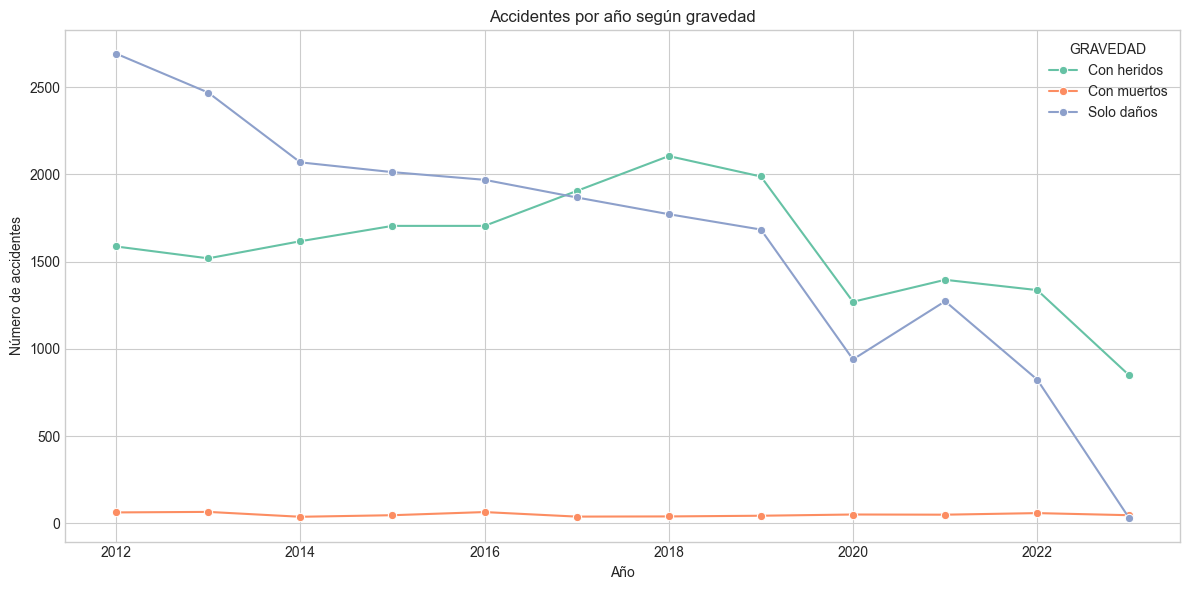

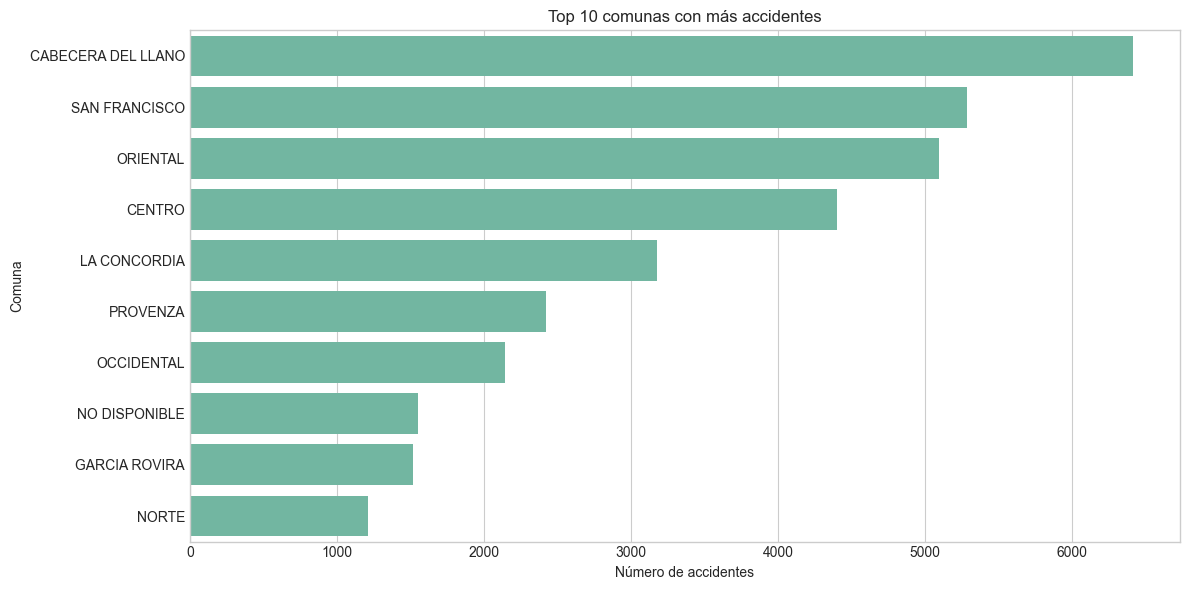

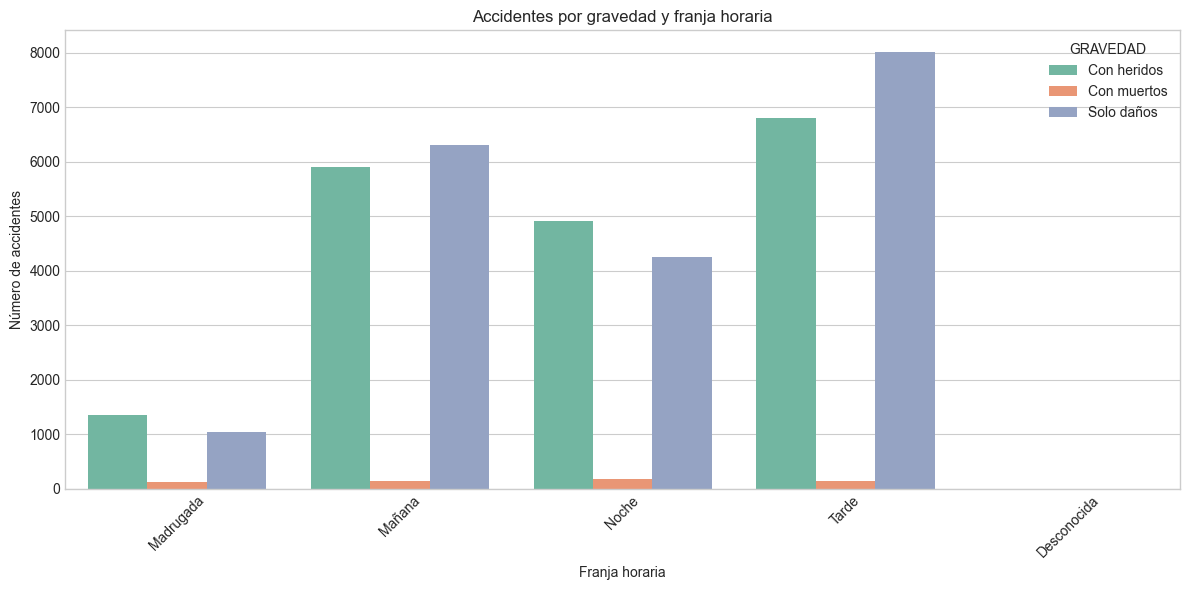

In [13]:
# Evolución del número de accidentes por año y gravedad
if all(col in df_vista.columns for col in ['anio', 'GRAVEDAD']):
    plt.figure()
    accidentes_anio = (
        df_vista
        .groupby(['anio', 'GRAVEDAD'])
        .size()
        .reset_index(name='n_accidentes')
    )
    sns.lineplot(
        data=accidentes_anio,
        x='anio',
        y='n_accidentes',
        hue='GRAVEDAD',
        marker='o'
    )
    plt.title('Accidentes por año según gravedad')
    plt.xlabel('Año')
    plt.ylabel('Número de accidentes')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron las columnas 'anio' y/o 'GRAVEDAD' en df_vista.")

# Comunas con mayor número de accidentes
if 'comuna_nombre' in df_vista.columns:
    plt.figure()
    top_comunas = (
        df_vista['comuna_nombre']
        .value_counts()
        .head(10)
        .sort_values(ascending=False)
    )
    sns.barplot(x=top_comunas.values, y=top_comunas.index)
    plt.title('Top 10 comunas con más accidentes')
    plt.xlabel('Número de accidentes')
    plt.ylabel('Comuna')
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'comuna_nombre' no está disponible en df_vista.")

# Cruce entre gravedad y franja horaria
if all(col in df_vista.columns for col in ['GRAVEDAD', 'franja_horaria']):
    plt.figure()
    tabla_cruce = (
        df_vista
        .groupby(['GRAVEDAD', 'franja_horaria'])
        .size()
        .reset_index(name='n_accidentes')
    )
    sns.barplot(
        data=tabla_cruce,
        x='franja_horaria',
        y='n_accidentes',
        hue='GRAVEDAD'
    )
    plt.title('Accidentes por gravedad y franja horaria')
    plt.xlabel('Franja horaria')
    plt.ylabel('Número de accidentes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron las columnas 'GRAVEDAD' y/o 'franja_horaria' en df_vista.")


## 6. Conclusiones de la Etapa 4 - Vista Minable

### ✅ Resultados principales

- Se construyó una **vista minable** a nivel de accidente, enriquecida con variables temporales y espaciales.  
- Se generó una **tabla resumen agregada** por año, mes, comuna y gravedad, útil para análisis de alto nivel.  
- Se validó la consistencia de las nuevas variables mediante visualizaciones exploratorias.

### 🎯 Impacto para etapas posteriores

- La estructura resultante facilita la formulación de preguntas de negocio más específicas.  
- Permite integrar con mayor facilidad técnicas de minería de datos o modelos de predicción.  
- Aporta trazabilidad entre los datos originales, los procesos de limpieza (Etapa 3) y la vista analítica final.

Con esta etapa se concluye la **preparación de datos**, dejando el dataset listo para análisis y
visualizaciones más avanzadas en herramientas estadísticas o de inteligencia de negocios.
